In [1]:
!pip install torch

In [2]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [7]:
!pip install ipython

In [8]:
from IPython.display import Image, display

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns


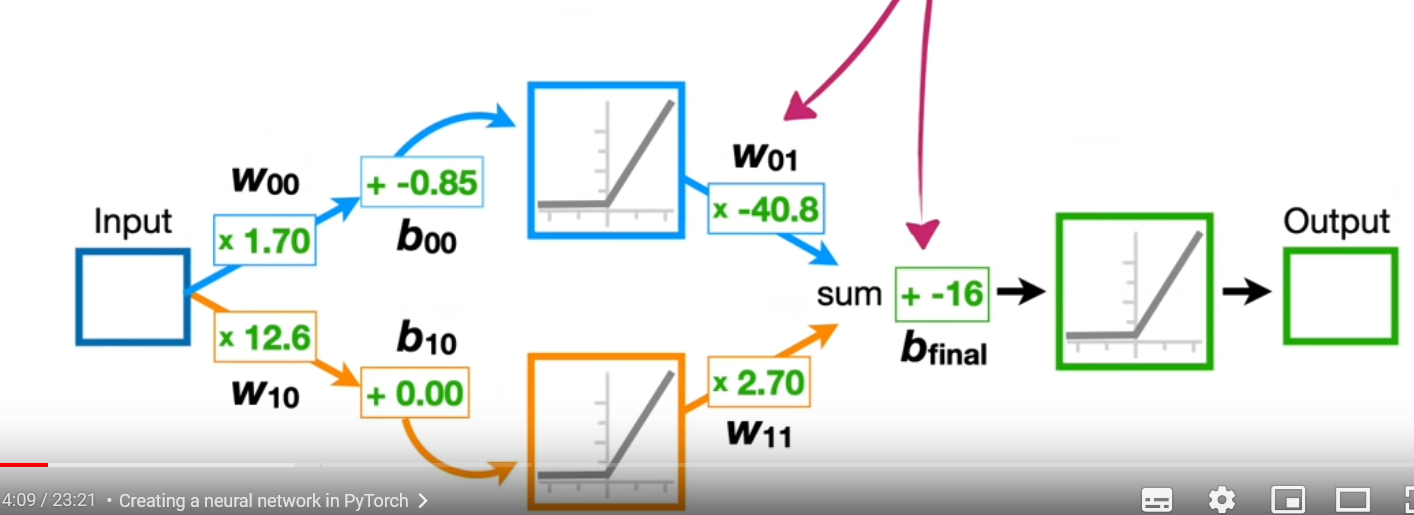

In [10]:
display(Image(filename='rede1.png'))

In [29]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)
        return output             

Text(0.5, 0, 'Dose')

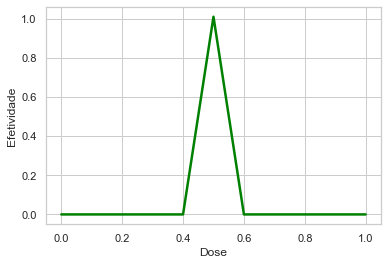

In [30]:
        input_doses = torch.linspace(start=0, end=1, steps=11)
        model = BasicNN()
        output_values = model(input_doses)
        
        sns.set(style="whitegrid")
        sns.lineplot(x=input_doses,y=output_values, color='green', linewidth=2.5)
        
        plt.ylabel('Efetividade')
        plt.xlabel('Dose')   